This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [3]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = 'removed_as_directed'

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [1]:
# First, import the relevant modules
import requests
from operator import is_not
from functools import partial
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


In [2]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
r = requests.get('https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?api_key=removed_as_directed')
list_des = r.json()['dataset']['column_names']
data_list = r.json()['dataset']['data']
print(list_des)
print(len(list_des))
# printing data for 1 day
print(data_list[1])


['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']
11
['2019-02-28', None, 75.0, 73.8, 75.0, None, 106203.0, 7931125.0, None, None, None]


#Inspect the JSON structure of the object you created, and take note of how nested it is,
#as well as the overall structure

The JSON object starts and ends with '{' and '}'. A number of string value pair are stored within them. Here the first object contains the string 'dataset'. The pairing value seperated by ':', nests another object with a number of string - value pairs. The string names and their corresponing values are explained here. The string names of the nested objects include (but not limited to) 'column_index', 'column_names', 'data', 'dataset_code', 'description', 'frequency', 'start_date', 'end_date', 'type' etc. The pairing values of those strings provide information about the dataset. For example, 'type' of the dataset is 'Time Series'; 'frequency' of it is 'daily'; value of 'column_names' string nests an array ([....]) of variable names (e.g., 'Date', 'open', 'Daily Turnover', etc.), which are actually the variable names of the 'data' string values.

The main focus is on the 'data' string and its paired values. The value of 'data' contains a nested array ([[....], [......],....[....]]). Elements of the outermost array are arrays containing information from every single day. Elements of the innermost array are values corresponding to each 'column_name' variable for a single day.

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [5]:
#1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017. 
#https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?api_key=sxXNWWLb2nA9CoZH2hiM&start_date=2017-01-01&end_date=2017-12-31
r = requests.get('https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?api_key=removed_as_directed&start_date=2017-01-01&end_date=2017-12-31')
# 2. Convert the returned JSON object into a Python dictionary.
data_dict = r.json()
print(type(data_dict))
# getting data variables
list_des = r.json()['dataset']['column_names']
# gettig finance data 
data_list_17 = r.json()['dataset']['data']
print(list_des)
print(len(list_des))
# for one day
print(data_list_17[0])

<class 'dict'>
['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']
11
['2017-12-29', 51.76, 51.94, 51.45, 51.76, None, 34640.0, 1792304.0, None, None, None]


In [7]:
#3. Calculate what the highest and lowest opening prices were for the stock in this period.
tran_data = [[row[i] for row in data_list_17] for i in range(len(list_des))]
list_des.index('Open')
#date = tran_data[0]
open_price = tran_data[list_des.index('Open')]
# removing none values
filt_open_price = list(filter(None.__ne__, open_price))
highest_open_price = max(filt_open_price)
print('Highest opening price is: $', highest_open_price)
lowest_open_price = min(filt_open_price)
print('Lowest opening price is: $', lowest_open_price)


Highest opening price is: $ 53.11
Lowest opening price is: $ 34.0


2017-12-14 00:00:00 2017-01-24 00:00:00


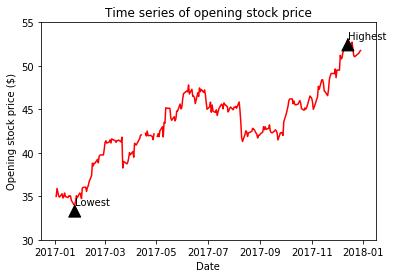

In [8]:
# visual represeantation of Q3
dates = tran_data[list_des.index('Date')]
date_times = []
for date in dates:
    date_time = datetime.strptime(date, '%Y-%m-%d')
    date_times.append(date_time)
    
highest_index = open_price.index(highest_open_price)
lowest_index = open_price.index(lowest_open_price)
highest_date = date_times[highest_index]
lowest_date = date_times[lowest_index]
print(highest_date, lowest_date)

plt.plot(date_times, open_price, 'red')
plt.ylim((30, 55))
plt.xlabel('Date')
plt.ylabel('Opening stock price ($)')
plt.title('Time series of opening stock price')
plt.annotate('Highest', xy=(highest_date, highest_open_price), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Lowest', xy=(lowest_date, lowest_open_price), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

The largest change between high and low price in one day: $ 2.81


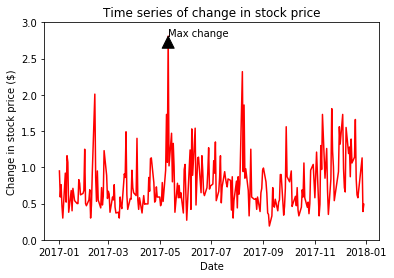

In [9]:
#4. What was the largest change in any one day (based on High and Low price)?
high_price = tran_data[list_des.index('High')]
low_price = tran_data[list_des.index('Low')]
change=[]
for j in range(len(high_price)):
    diff = abs(high_price[j] - low_price[j])
    change.append(diff)
largest_change = max(change)
print('The largest change between high and low price in one day: $', round(largest_change, 2))

max_index = change.index(largest_change)
max_date = date_times[max_index]

# plotting the change
plt.plot(date_times, change, 'red')
plt.ylim((0, 3))
plt.xlabel('Date')
plt.ylabel('Change in stock price ($)')
plt.title('Time series of change in stock price')
plt.annotate('Max change', xy=(max_date, largest_change), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


In [10]:
#5. What was the largest change between any two days (based on Closing Price)?
close_price = tran_data[list_des.index('Close')]
change_day = []
for n in range(len(close_price)-1):
    diff_day = abs(close_price[n] - close_price[n+1])
    change_day.append(diff_day)

largest_change_day = max(change_day)
print('The largest change in closing price between any two consecutive days is: $', round(largest_change_day, 2))

The largest change in closing price between any two consecutive days is: $ 2.56


In [17]:
#6. What was the average daily trading volume during this year?

traded_volume = tran_data[list_des.index('Traded Volume')]
traded_volume[:10]
avg_vol = np.mean(traded_volume)
print('The average daily trading volume in 2017 is: $', round(avg_vol, 2))


The average daily trading volume in 2017 is: $ 89124.34


In [16]:
#7. (Optional) What was the median trading volume during this year. 
#(Note: you may need to implement your own function for calculating the median.)
len_vol = len(traded_volume)
# although the list contains odd number of elements, so the first condition applies, both are included here for generalization
if len_vol % 2 ==1:
    vol_median = sorted(traded_volume)[len_vol//2]
else:
    vol_median = sum(sorted(traded_volume)[len_vol//2-1:len_vol//2+1])/2.0
print('The median trading volume during this year is: $', round(vol_median, 2))


The median trading volume during this year is: $ 76286.0
